In [66]:
import ydf
import pandas as pd
from ydf import Task

# Load your data as a Pandas DataFrame
data = pd.read_csv("./inputs/train.csv")

In [67]:
# Split into train and test sets (adjust as needed)
import numpy as np


def split_dataset(dataset, test_ratio=0.20):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]


train_data, test_data = split_dataset(data)
print("{} examples in training, {} examples in testing.".format(
    len(train_data), len(test_data)))

1169 examples in training, 291 examples in testing.


In [68]:
# Define the label column
label = "SalePrice"

In [69]:
# Initialize the learner (regression task shown here)
learner = ydf.RandomForestLearner(label=label, task=Task.REGRESSION)

In [70]:
# Train the model
model = learner.train(train_data)

Train model on 1169 examples
Model trained in 0:00:00.507254


In [71]:
# Evaluate on the test set
evaluation = model.evaluate(test_data)

# For regression, print RMSE
print("Root Mean Squared Error (RMSE):", evaluation.rmse)

Root Mean Squared Error (RMSE): 22356.900435233358


In [72]:
# Optional: Save the model
model.save("my_ydf_model")

In [73]:
from sklearn.metrics import root_mean_squared_log_error

# Predict on the test set
predictions = model.predict(test_data)

# Extract true labels
true_values = test_data["SalePrice"]  # Replace "price" with your label column name

# Compute RMSLE
rmsle = root_mean_squared_log_error(true_values, predictions)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle)

Root Mean Squared Logarithmic Error (RMSLE): 0.11984148621559143


In [89]:
dir(model)
model.variable_importances()["NUM_AS_ROOT"]

[(115.0, 'OverallQual'),
 (54.0, 'ExterQual'),
 (44.0, 'GarageCars'),
 (38.0, 'Neighborhood'),
 (21.0, 'GrLivArea'),
 (10.0, 'KitchenQual'),
 (6.0, 'YearBuilt'),
 (6.0, 'GarageArea'),
 (2.0, 'BsmtQual'),
 (2.0, 'TotalBsmtSF'),
 (1.0, 'FullBath'),
 (1.0, 'GarageFinish')]

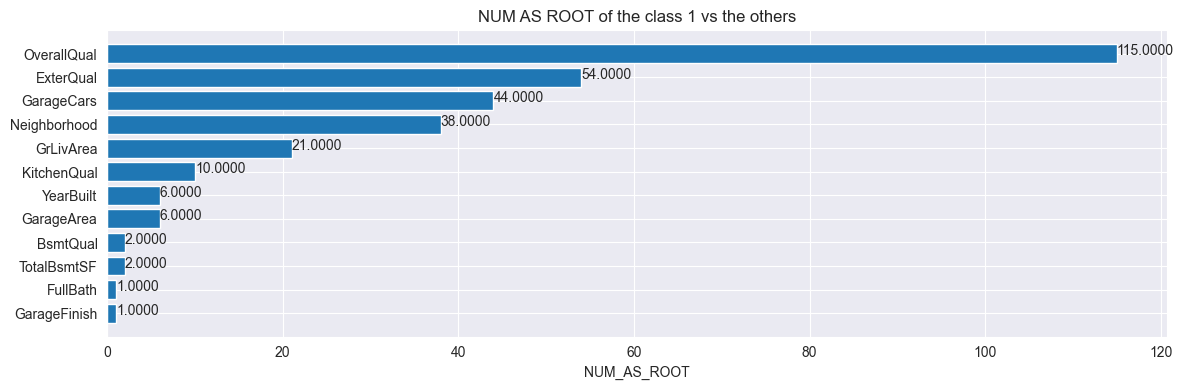

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = model.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[1] for vi in variable_importances]
feature_importances = [vi[0] for vi in variable_importances]

# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [96]:
test_file_path = "./inputs/test.csv"
test_data = pd.read_csv(test_file_path)
test_data_copy = test_data.copy()
ids = test_data.pop('Id')

preds = model.predict(test_data_copy)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

,Id,SalePrice
0,1461,123880.023438
1,1462,153739.171875
2,1463,179277.343750
3,1464,181113.984375
4,1465,191130.109375


In [97]:
# Save the output to a submission file
output.to_csv("./outputs/submission.csv", index=False)